# Car Insurance Claim Prediction

#### Predict whether the policyholder will file a claim in the next 6 months or not.

# Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
data=pd.read_csv("train.csv")

In [55]:
data

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

# Size of the data 

In [57]:
data.shape

(58592, 44)

# Datatypes

In [58]:
data.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

### OBJECT DATA TYPES

In [59]:
data.drop(['policy_id','make','model'],axis=1,inplace=True)

In [60]:
object_data=data.select_dtypes(include= [object]) 

In [61]:
object_data

,area_cluster,segment,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C1,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,...,No,No,No,No,No,Yes,No,No,No,Yes
1,C2,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,...,No,No,No,No,No,Yes,No,No,No,Yes
2,C3,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,...,No,No,No,No,No,Yes,No,No,No,Yes
3,C4,C1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,No,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,C5,A,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,C8,A,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,C14,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,...,No,No,No,No,No,Yes,No,No,No,Yes
58589,C5,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,...,No,No,No,No,No,Yes,No,No,No,Yes
58590,C8,B2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,Yes,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [62]:
numerical_data = data.select_dtypes(include=['float64','int64'])

In [63]:
numerical_data

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,2,796,3,5,4.6,3445,1515,1475,1185,0,0
1,0.672619,0.02,0.375000,27003,2,796,3,5,4.6,3445,1515,1475,1185,0,0
2,0.841110,0.02,0.384615,4076,2,796,3,5,4.6,3445,1515,1475,1185,0,0
3,0.900277,0.11,0.432692,21622,2,1197,4,5,4.8,3995,1735,1515,1335,2,0
4,0.596403,0.11,0.634615,34738,2,999,3,5,5.0,3731,1579,1490,1155,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,2,999,3,5,5.0,3731,1579,1490,1155,2,0
58588,1.199642,0.02,0.519231,7788,2,796,3,5,4.6,3445,1515,1475,1185,0,0
58589,1.162273,0.05,0.451923,34738,2,796,3,5,4.6,3445,1515,1475,1185,0,0
58590,1.236307,0.14,0.557692,8794,2,1197,4,5,4.8,3845,1735,1530,1335,2,0


# MISSING VALUES

In [64]:
data.isnull().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
segment                             0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width                               0
height                              0
gross_weight

# Target variable

In [65]:
target=data.is_claim
target

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

In [66]:
target.value_counts(normalize=True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

<AxesSubplot: >

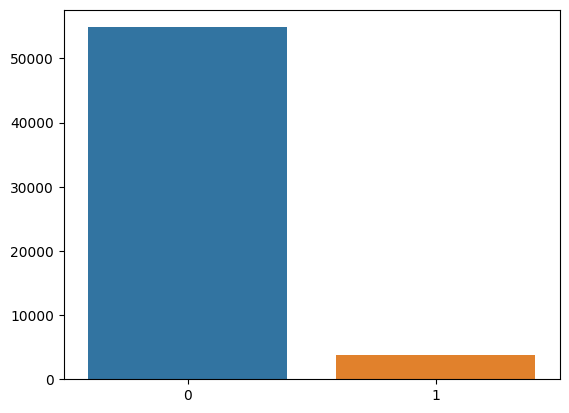

In [67]:
sns.barplot(x = [0, 1], y = [54844, 3784])

# BASIC EDA

In [68]:
data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [69]:
data.describe(include="all")

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,segment,fuel_type,max_torque,max_power,engine_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592,58592.000000,58592,58592,58592,58592,58592,...,58592,58592,58592,58592,58592,58592,58592,58592,58592.000000,58592.000000
unique,NaN,NaN,NaN,22,NaN,6,3,9,9,11,...,2,2,2,2,2,2,2,2,NaN,NaN
top,NaN,NaN,NaN,C8,NaN,B2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,NaN,NaN,NaN,13654,NaN,18314,20532,17796,17796,14948,...,32177,42435,42435,57383,34291,36309,42435,58229,NaN,NaN
mean,0.611246,0.069424,0.469420,NaN,18826.858667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759950,0.063968
std,0.414156,0.056721,0.122886,NaN,17660.174792,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.389576,0.244698
min,0.002735,0.000000,0.288462,NaN,290.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,0.210250,0.020000,0.365385,NaN,6112.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,0.573792,0.060000,0.451923,NaN,8794.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000
75%,1.039104,0.110000,0.548077,NaN,27003.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000


# UNIVARIANT ANALYSIS

In [70]:
target_obj = object_data.columns.to_list()
target_obj

['area_cluster',
 'segment',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [71]:
target_num = numerical_data.columns.to_list()
target_num

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim']

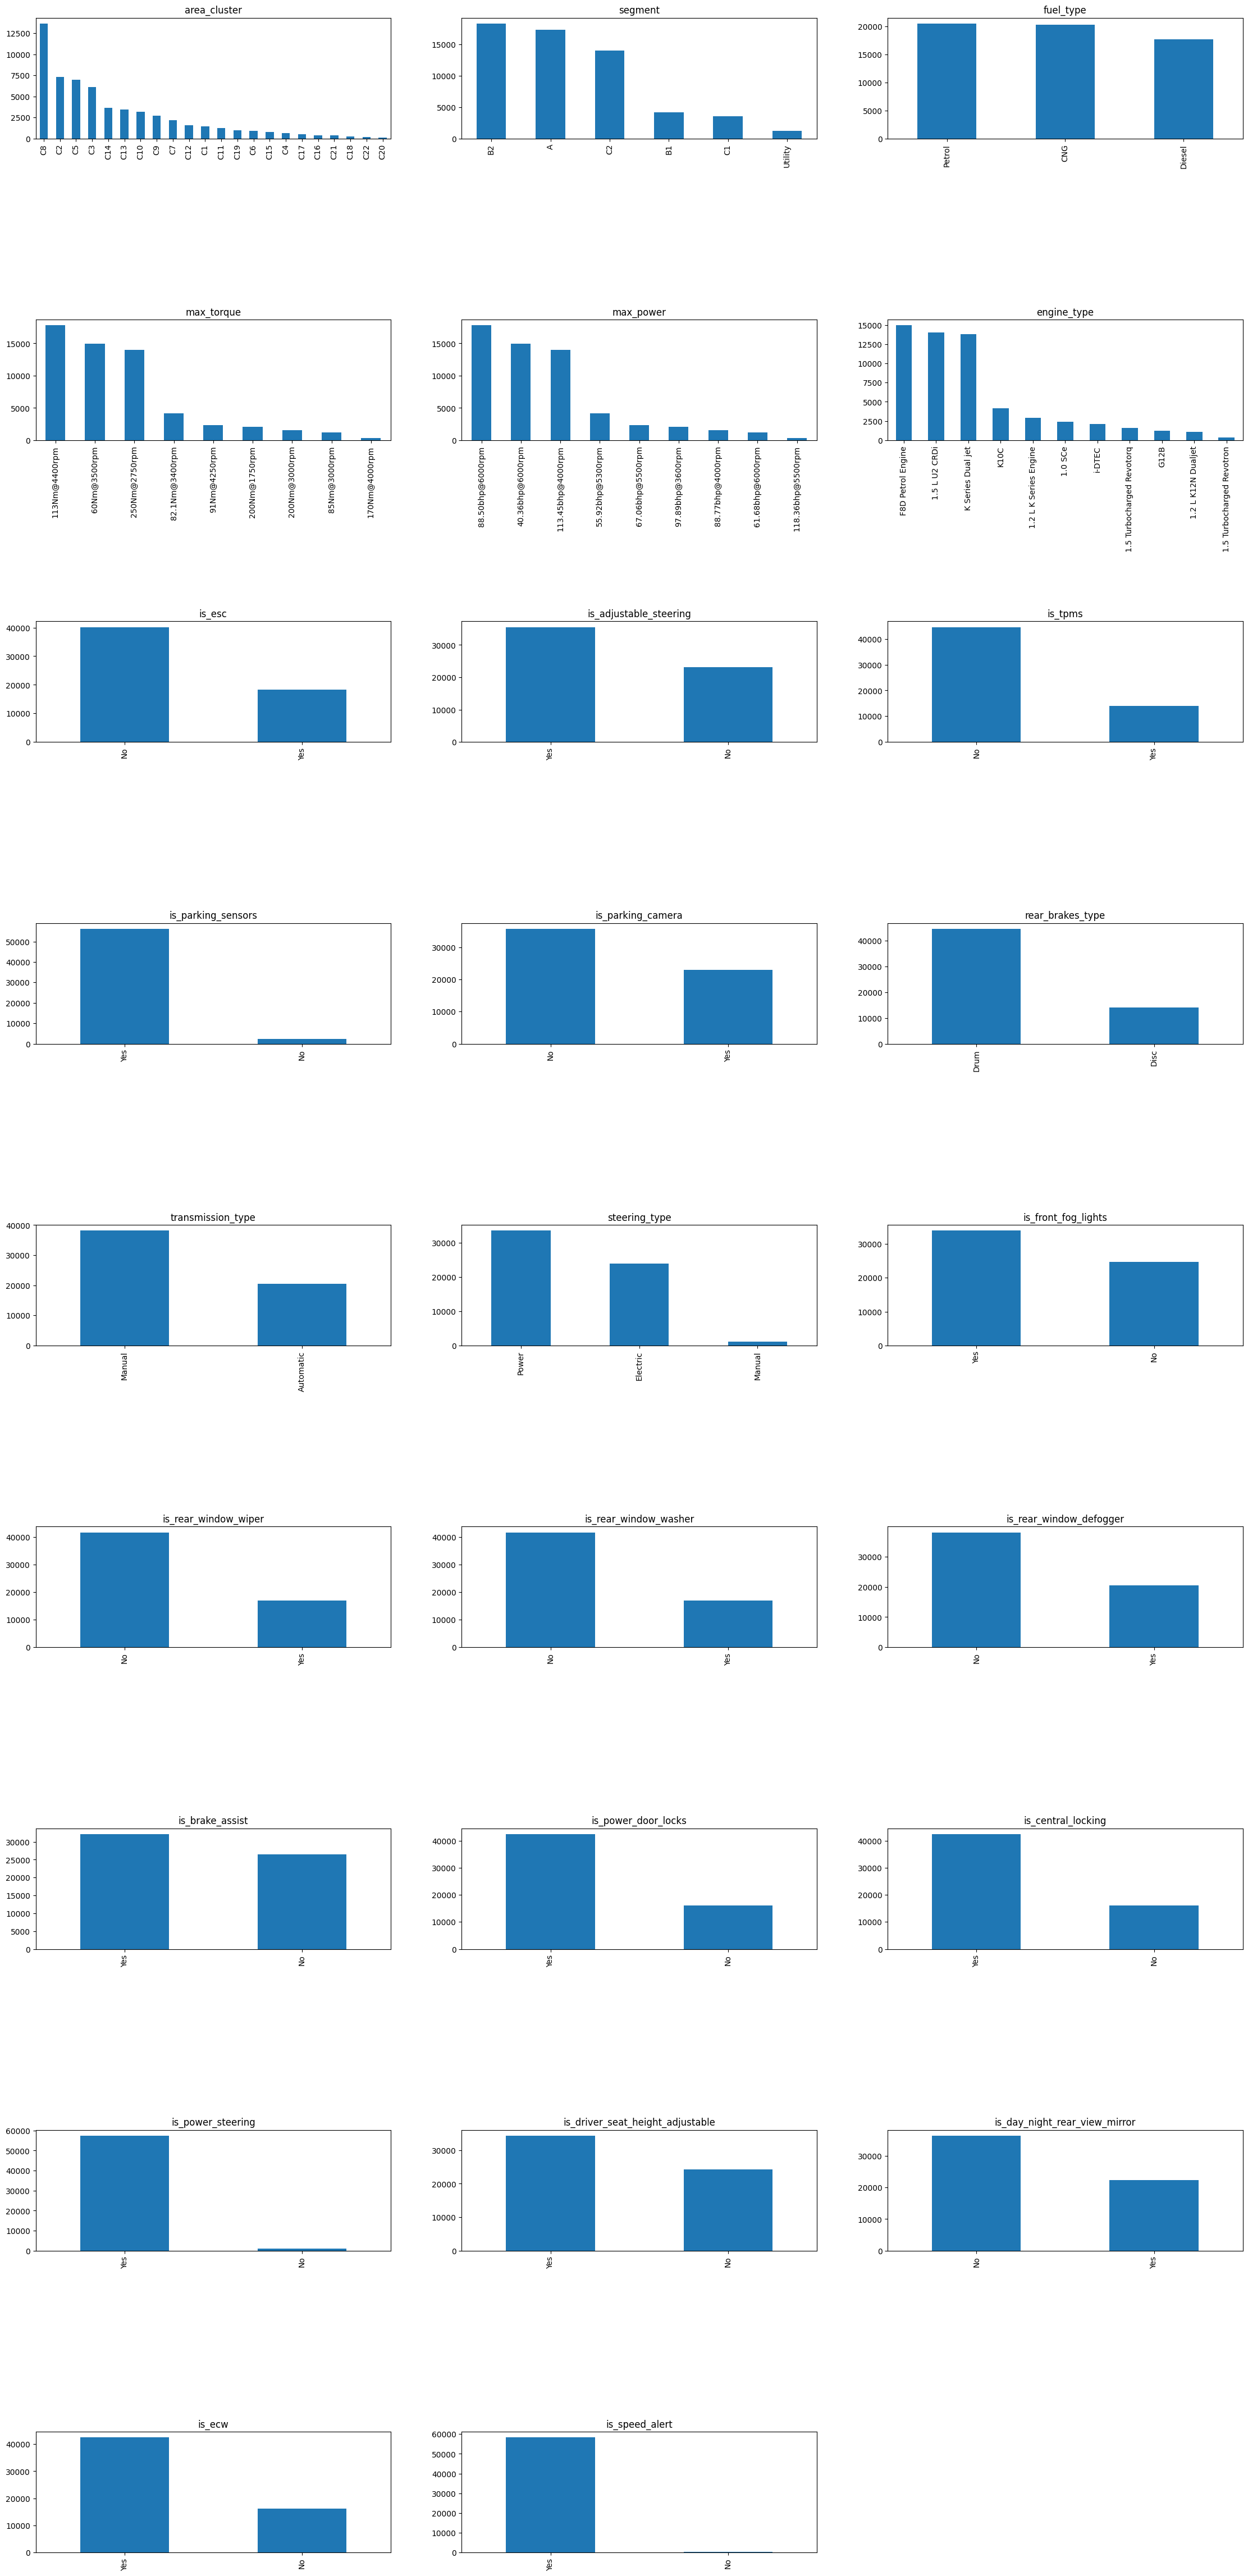

In [72]:
plt.figure(figsize=(20,8))
row = 14
col=3
iterator=1
for i in  target_obj:
    plt.subplots_adjust(left=None, bottom=1, right=1.2, top=10, wspace=None, hspace=1.5)
    plt.subplot(row,col,iterator)
    data[i].value_counts().plot(kind='bar')
    plt.title(i)
    iterator+=1
    plt.xticks(rotation=90)

plt.show()

C:\Users\yuday\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yuday\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yuday\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

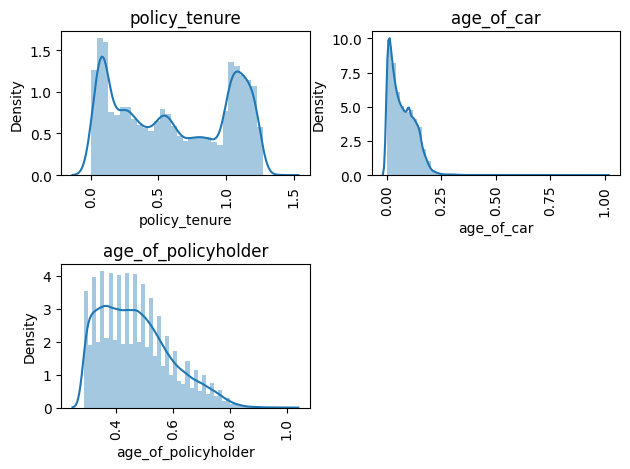

In [73]:
n=['policy_tenure', 'age_of_car', 'age_of_policyholder']
rows=2
columns=2
iterator=1

for i in n:
    plt.subplot(rows,columns,iterator)
    sns.distplot(data[i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

<AxesSubplot: >

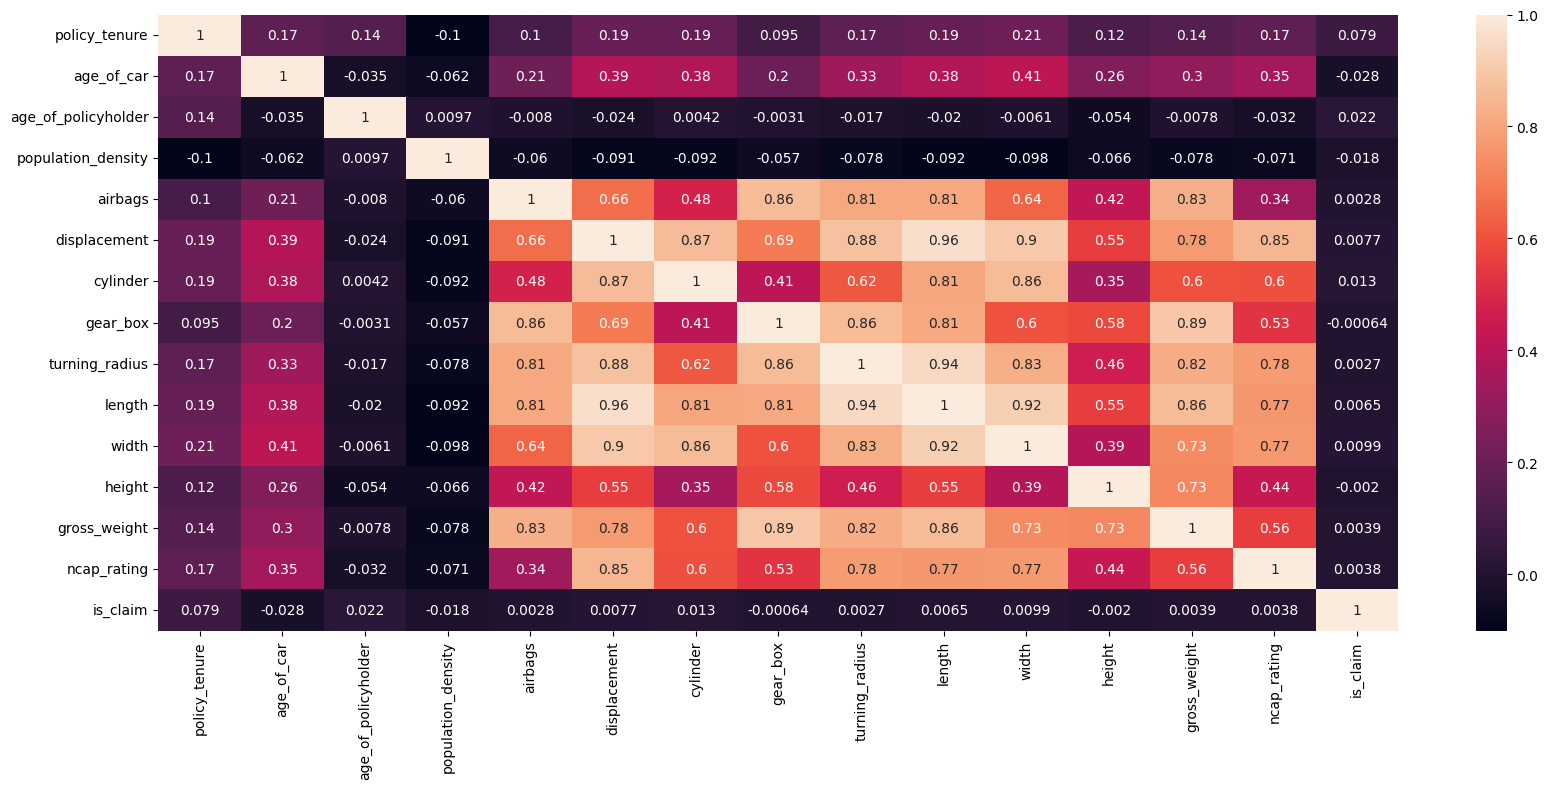

In [74]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)

## ENCODING

In [75]:
numerical_data=data.select_dtypes(["float64","int64"])
numerical_data.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'airbags', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'ncap_rating', 'is_claim'],
      dtype='object')

In [76]:
object_data=data.select_dtypes(["object"])
object_data.columns

Index(['area_cluster', 'segment', 'fuel_type', 'max_torque', 'max_power',
       'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [77]:
categorical_data=pd.get_dummies(object_data)
categorical_data

,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,...,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes
0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,1
58588,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
58589,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
58590,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1


In [78]:
data=pd.concat([numerical_data,categorical_data],axis=1)

In [79]:
X=data.drop("is_claim",axis=1)
y=data["is_claim"]

In [80]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [81]:
y_res.value_counts()

0    54844
1    54844
Name: is_claim, dtype: int64

In [82]:
new=pd.concat([X_res,y_res],axis=1)
new

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,gear_box,turning_radius,length,...,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes,is_claim
0,0.515874,0.05,0.644231,4990,2,796,3,5,4.60,3445,...,1,1,0,1,0,1,0,0,1,0
1,0.672619,0.02,0.375000,27003,2,796,3,5,4.60,3445,...,1,1,0,1,0,1,0,0,1,0
2,0.841110,0.02,0.384615,4076,2,796,3,5,4.60,3445,...,1,1,0,1,0,1,0,0,1,0
3,0.900277,0.11,0.432692,21622,2,1197,4,5,4.80,3995,...,1,0,1,0,1,0,1,0,1,0
4,0.596403,0.11,0.634615,34738,2,999,3,5,5.00,3731,...,1,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109683,0.527062,0.03,0.317308,27003,2,998,3,5,4.70,3655,...,1,1,0,1,0,0,1,0,1,1
109684,1.093713,0.02,0.298077,27003,6,1197,4,5,4.85,3990,...,1,0,1,0,1,0,1,0,1,1
109685,1.008965,0.16,0.365385,8794,2,1197,4,5,4.80,3845,...,1,0,1,0,1,0,1,0,1,1
109686,0.403801,0.20,0.423077,8794,2,1197,4,5,4.80,3845,...,1,0,1,0,1,0,1,0,1,1


In [83]:
n=new.drop("is_claim",axis=1)
n1=new["is_claim"]

# FEATURE SELECTION

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [85]:
r_f=SelectKBest(score_func=chi2,k=115)
o_f=r_f.fit(n,n1)

In [86]:
o_f.scores_

array([7.12998553e+02, 1.73467876e+01, 6.77377979e+00, 2.69214205e+06,
       2.09540548e+00, 1.24093627e+03, 4.40699394e+00, 1.88017369e-02,
       2.72049992e-02, 3.65887802e+02, 2.83764493e+02, 8.13401265e+00,
       1.76835756e+02, 5.34430051e+00, 3.25030012e+01, 1.50094237e+02,
       5.57603687e+00, 2.32675391e+01, 2.95134239e+01, 8.58852459e+01,
       3.26278702e+01, 3.45945946e-01, 5.36193029e+01, 3.46963351e+01,
       1.07343832e+01, 5.42625929e+01, 2.60215054e+00, 6.71502591e+00,
       8.18181818e+00, 4.16193955e+01, 8.73053892e+00, 4.00478869e+01,
       7.29355033e-02, 4.62982172e+01, 5.44886483e+01, 8.11382468e+01,
       2.40593806e+01, 1.58425396e+01, 4.88054246e+01, 3.34140070e-01,
       6.09802576e-04, 1.31469793e+00, 2.57569267e+01, 5.15484666e-01,
       1.83510437e+01, 4.53475480e+01, 1.98367347e+01, 1.60726243e+00,
       1.33867508e+01, 6.09802576e-04, 1.22416303e+01, 1.58425396e+01,
       1.31469793e+00, 2.04548487e+01, 6.09802576e-04, 1.98367347e+01,
      

In [87]:
dfscores=pd.DataFrame(o_f.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [88]:
features=pd.concat([dfcolumns,dfscores],axis=1)

In [89]:
features

,0,Score
0,policy_tenure,7.129986e+02
1,age_of_car,1.734679e+01
2,age_of_policyholder,6.773780e+00
3,population_density,2.692142e+06
4,airbags,2.095405e+00
...,...,...
110,is_day_night_rear_view_mirror_Yes,1.810525e+01
111,is_ecw_No,1.353478e+01
112,is_ecw_Yes,5.025078e+00
113,is_speed_alert_No,1.983673e+01


In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(n,n1,test_size=0.25,random_state=42)

In [91]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()
RF_model.fit(x_train,y_train)

RandomForestClassifier()

In [92]:
default_model=RF_model.predict(x_test)

In [93]:
default_model

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [94]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
cm= confusion_matrix(y_test, default_model)  

In [95]:
# Finding precision and recall
accuracy = accuracy_score(y_test, default_model)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, default_model)
print("Precision :", precision)
recall = recall_score(y_test, default_model)
print("Recall    :", recall)
F1_score = f1_score(y_test, default_model)
print("F1-score  :", F1_score)

Accuracy   : 0.9811829917584421
Precision : 0.9633079712721325
Recall    : 1.0
F1-score  : 0.9813111191597248


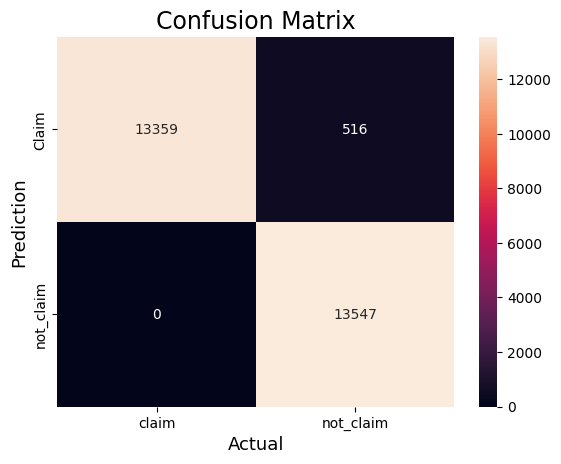

In [96]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['claim', 'not_claim'],
            yticklabels=['Claim', 'not_claim'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 

# Hyperparameter tuning


In [97]:
!pip install sklearn

In [98]:
from sklearn.model_selection import RandomizedSearchCV
param = {'max_depth': [6,9, None], 
         'n_estimators':[50, 70, 100,200,250,300], 
          'max_features': [i for i in range(1,15)],
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False],
          'min_samples_leaf': [i for i in range(1,4)],}
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, n_iter =10, cv=9,error_score='raise')

In [99]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [100]:
rnd_search.fit(n,n1)

RandomizedSearchCV(cv=9, error_score='raise',
                   estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 9, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13,
                                                         14],
                                        'min_samples_leaf': [1, 2, 3],
                                        'n_estimators': [50, 70, 100, 200, 250,
                                                         300]})

In [103]:
rnd_search.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 1,
 'max_features': 9,
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': False}

In [104]:
rnd_search.best_score_

0.9893698611436249

In [105]:
rnd_search

RandomizedSearchCV(cv=9, error_score='raise',
                   estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 9, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13,
                                                         14],
                                        'min_samples_leaf': [1, 2, 3],
                                        'n_estimators': [50, 70, 100, 200, 250,
                                                         300]})

In [106]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,min_samples_leaf=1,max_features=11,max_depth=None,criterion='entropy',bootstrap=True)
RF_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=11)

In [107]:
default_model=RF_model.predict(x_test)

In [108]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
cm= confusion_matrix(y_test, default_model)  

In [109]:
# Finding precision and recall
accuracy = accuracy_score(y_test, default_model)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, default_model)
print("Precision :", precision)
recall = recall_score(y_test, default_model)
print("Recall    :", recall)
F1_score = f1_score(y_test, default_model)
print("F1-score  :", F1_score)

Accuracy   : 0.980417183283495
Precision : 0.9618716273785857
Recall    : 1.0
F1-score  : 0.9805653070826246


In [ ]:
Accuracy   : 0.9811829917584421
Precision : 0.9633079712721325
Recall    : 1.0
F1-score  : 0.9813111191597248

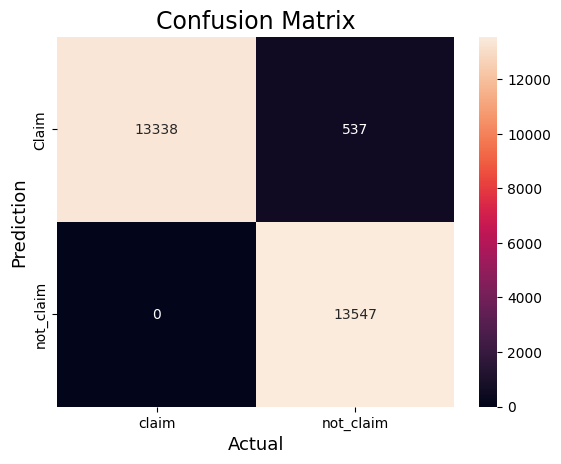

In [110]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['claim', 'not_claim'],
            yticklabels=['Claim', 'not_claim'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 